![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [46]:
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [2]:
hours = crimes['TIME OCC'].str[:2]
peak_crime_hour = int(hours.mode()[0])

print(f"The hour {peak_crime_hour} has the highest frequency of crimes.")

The hour 12 has the highest frequency of crimes.


In [40]:
crime_type = crimes[['Crm Cd Desc']].copy()
crime_type['Hour OCC'] = crimes['TIME OCC'].astype(str).str[:2].astype(int)

crime_peak_time = crime_type['Crm Cd Desc']
crime_mode_time = crime_type.groupby(['Crm Cd Desc']).agg(lambda x: x.mode().iloc[0]).reset_index()

/var/folders/3v/hs7dmb6s7_j1v81y4__glw1r0000gn/T/ipykernel_19618/1239118977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_mode_time, x='Hour OCC', y='Crm Cd Desc', palette='viridis')


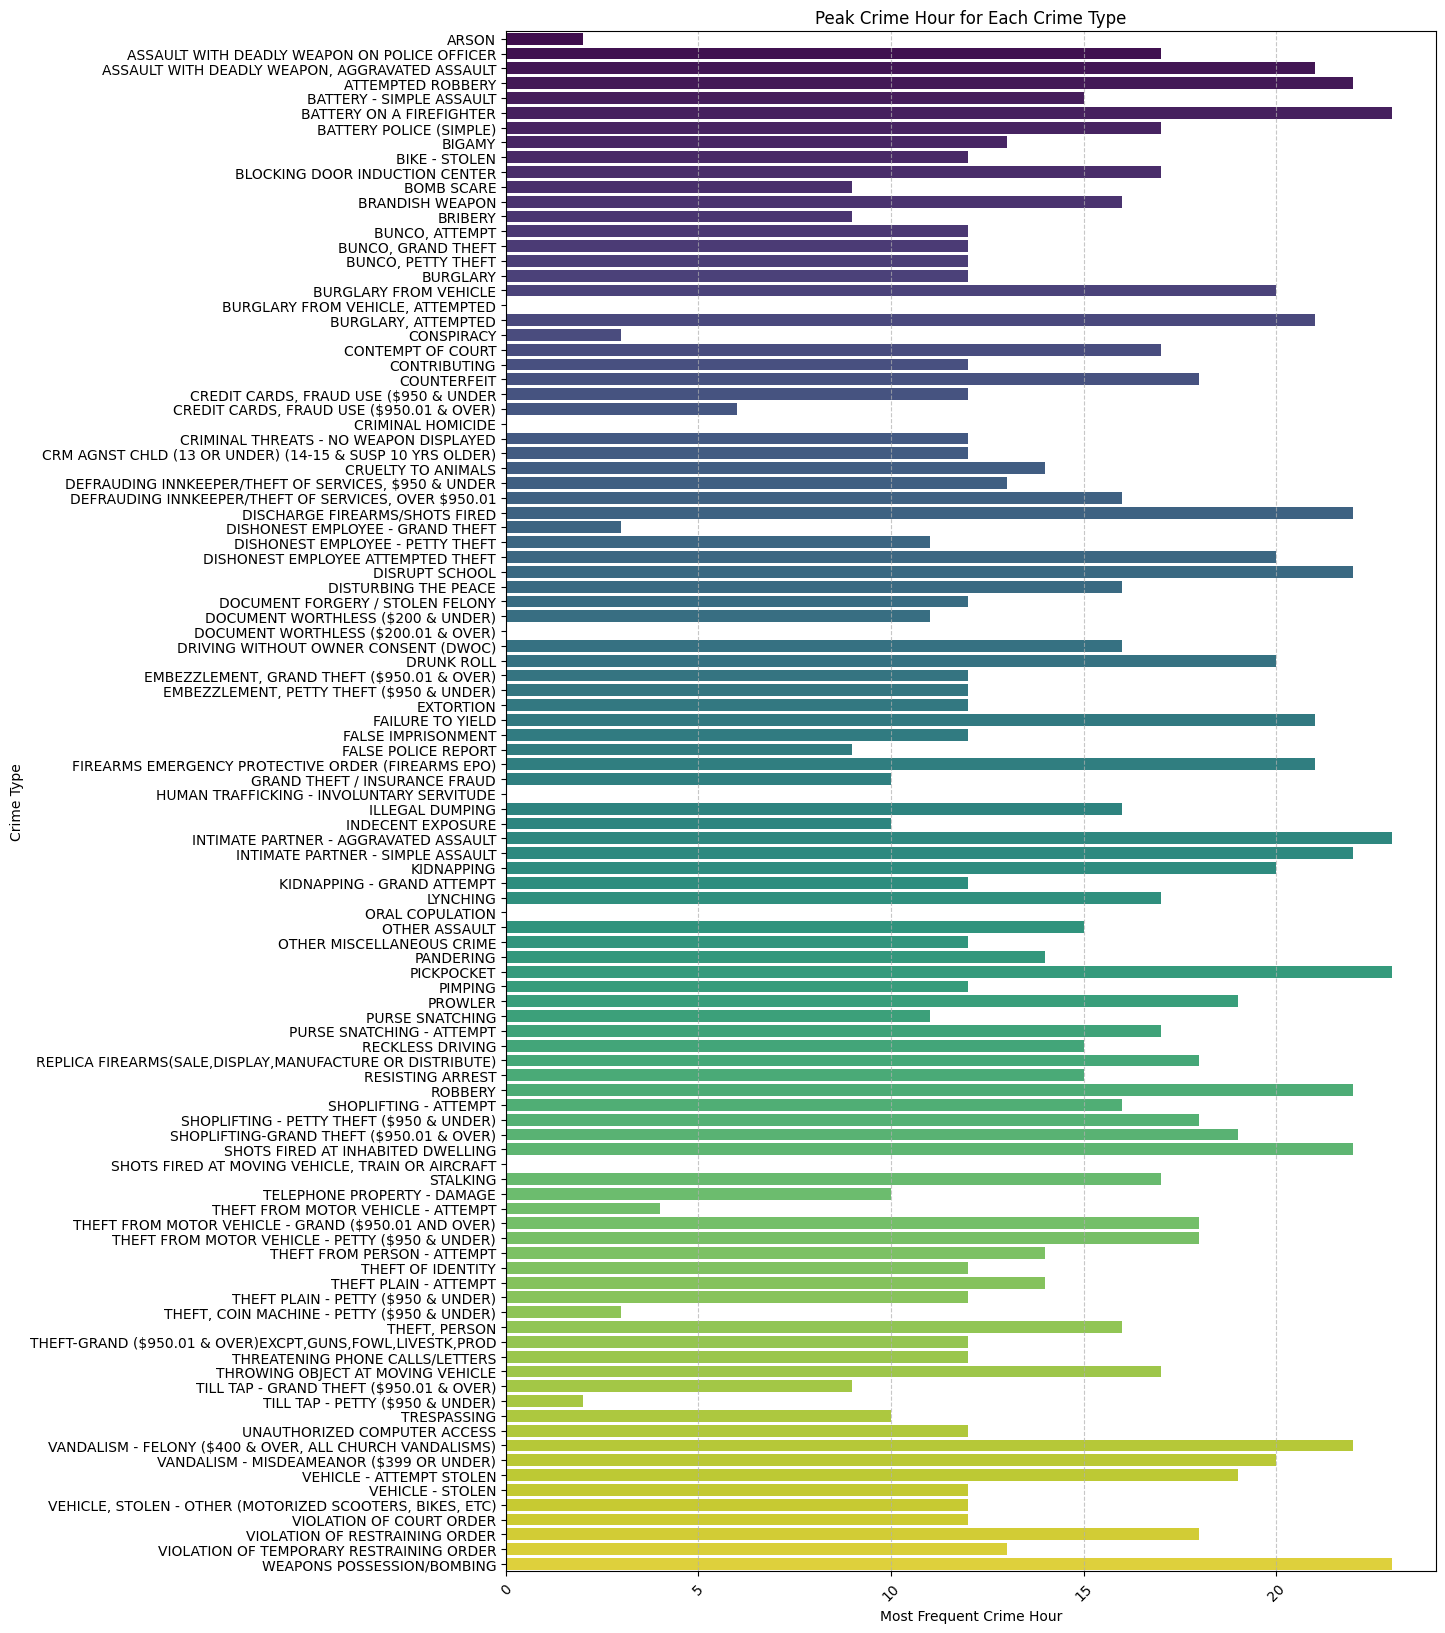

In [58]:
plt.figure(figsize=(12, 20))
sns.barplot(data=crime_mode_time, x='Hour OCC', y='Crm Cd Desc', palette='viridis')

plt.xlabel('Most Frequent Crime Hour')
plt.ylabel('Crime Type')
plt.title('Peak Crime Hour for Each Crime Type')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [3]:
night_hours = crimes[(crimes['TIME OCC'].astype(int) <= 359 ) | 
                     (crimes['TIME OCC'].astype(int) >= 2200)]

peak_night_crime_location = night_hours['AREA NAME'].mode()[0]

print(f"The area {peak_night_crime_location} has the largest frequency of night crimes")

The area Central has the largest frequency of night crimes


In [39]:
age_group = pd.cut(crimes['Vict Age'], bins = [0, 17, 25, 34, 44, 54, 64, 200], labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"])
age_group = age_group.value_counts()

victim_ages = pd.Series(data = age_group, index=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"])

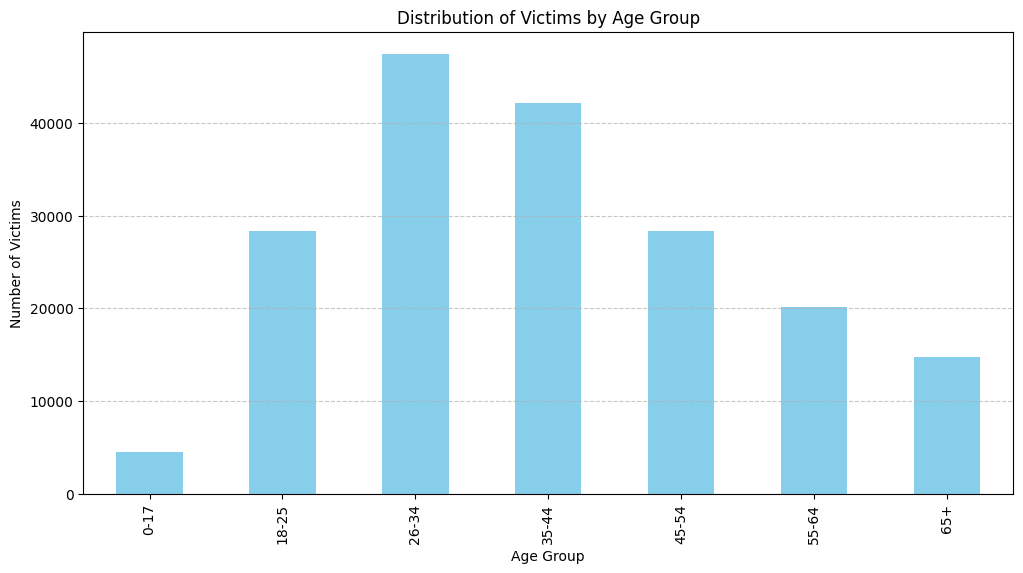

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
victim_ages.plot(kind='bar', color='skyblue')

plt.title("Distribution of Victims by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [64]:
crime_status = crimes['Status Desc'].value_counts()
total_crimes = crime_status.sum()

unresolved_percentage = ((crime_status['UNK'] + crime_status['Invest Cont']) / total_crimes) * 100
print(f"The percentage of unsolved crimes in the entire dataset is {round(unresolved_percentage)}%.")

The percentage of unsolved crimes in the entire dataset is 83%.
